In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "Pran@12_3#@pqr123",
                             database = "ecommerce")
cur = db.cursor()     

# List all unique cities where customers are located.

In [2]:
query =  """select distinct(customer_city) from customers limit 20 """
cur.execute(query)
data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',)]

# Count the number of orders placed in 2017.

In [3]:
query = """select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()

data

[(360808,)]

# Find the total sales per category.

In [4]:
query = """select products.product_category category, round(sum(payments.payment_value),2) sales 
            from products 
            join order_items
            on products.product_id = order_items.product_id
            join payments
            on payments.order_id = order_items.order_id
            group by category limit 20"""

cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data , columns = ["Category","Sales"])
df

,Category,Sales
0,perfumery,1.459407e+08
1,Furniture Decoration,4.118908e+08
2,telephony,1.402220e+08
3,bed table bath,4.932155e+08
4,automotive,2.454608e+08
5,computer accessories,4.565752e+08
6,housewares,3.152903e+08
7,babies,1.554756e+08
8,toys,1.782829e+08
9,Furniture office,1.862860e+08


# Calculate the percentage of orders that were paid in installments.

In [7]:
query = """select sum(case when payment_installments>=1 then 1 else 0 end)/count(*)*100 from payments """
cur.execute(query)
data = cur.fetchall()
data

[(Decimal('99.9981'),)]

# Count number of customers from each state

<function matplotlib.pyplot.show(close=None, block=None)>

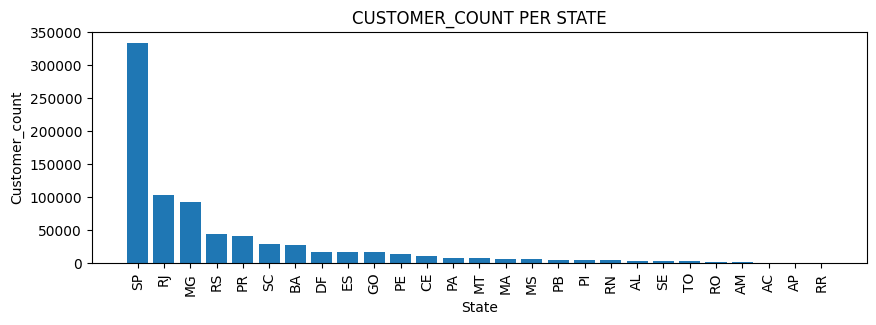

In [58]:
query = """select customer_state, count(customer_id) as cnt
from customers
group by customer_state
order by cnt desc"""
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["State","Customer_count"])
plt.figure(figsize = (10,3))
plt.bar(df["State"],df["Customer_count"])

plt.xticks(rotation = 90)
plt.xlabel("State")
plt.ylabel("Customer_count")
plt.title("CUSTOMER_COUNT PER STATE")
plt.show

# **Medium Questions**
# Calculate order numbers per month in 2018.

<function matplotlib.pyplot.show(close=None, block=None)>

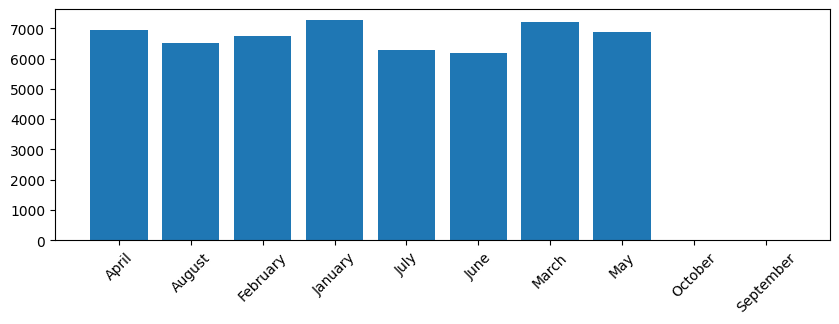

In [56]:
query = """select count(distinct(order_id)),monthname(order_purchase_timestamp) as mnt 
from orders 
where year(order_purchase_timestamp) = 2018
group by mnt"""
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["ordeer_count","month"])
df
plt.figure(figsize=(10,3))
plt.bar(df["month"],df["ordeer_count"])
plt.xticks(rotation = 45)

plt.show
